Calvin Bales \
Phys2600 Homework 1\
Collaborated with Erin Morissette

In [88]:
import numpy as np
import matplotlib.pyplot as plt

Problem 1\
a)

In [48]:
def Simpson(f, start, stop, N, args = None):
    """
    A simple Simpson's rule integrator
    
    Arguments:
    f - A function to integrate, the function must take a single argument that is an independent
    variable
    start - lower limit of integral
    stop - upper limit of integral
    N - number of steps (must be an even number)
    """
    width = stop - start
    h = width/N
    x = np.arange(start, stop+h, h)
    
    s = (f(start,*args) + f(stop,*args)+ 2*f(x[2:-2:2],*args).sum()) * 1/3
    t = 0
    epsilon = 0.001
    error = 10
    
    while error>epsilon:
        F=h*(s+2*t)
        s+=t
        N=N*2
        h=width/N
        x = np.arange(start, stop+h, h)
        t= (2/3)*f(x[1:-2:2],*args).sum()
        m=h*(s+2*t)
        error=(1/15)*(m-F)
        
    return m

In [77]:
k_B=1.3806*10**-23

def polynomial(x,*args):
    f = 0*x
    for (i,a) in enumerate(args):
        f += a*x**(i)
    return f

def integrand(x,power1,power2):
    f = ((x**power1)*np.exp(x))/(np.exp(x)-1)**power2
    return f

def Debye(T,T_D,density,vol): #temp, debye temp, accuracy 
    Cv=9*k_B*((T/T_D)**3)*Simpson(integrand, 0.00001, T_D/T, 100, args=(4,2))*density*vol
    return Cv
Cv=Debye(200,500,1,1)

print('specific heat =',Cv)

specific heat = 3.0787687379713665e-23


b)

In [118]:
cv_Pb=[]
cv_Al=[]
cv_Di=[]
temps = np.linspace(1,2500,10000)
TD_Pb=105 #lead 
TD_Al=428 #aluminium 
TD_Di=2230 #diamond
for t in temps:
    cv_Pb.append(Debye(t,TD_Pb,11343,10**-6))

In [ ]:
for t in temps:
    cv_Al.append(Debye(t,TD_Al,2710,10**-6))

In [ ]:
for t in temps:
    cv_Di.append(Debye(t,TD_Di,3530,10**-6))

Text(0.5, 1.0, 'Heat Capacity as a Function of Temperature')

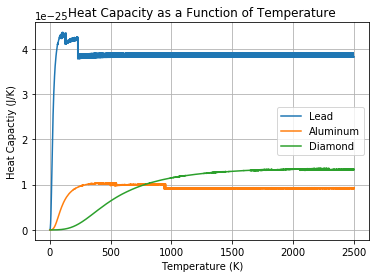

In [123]:
plt.plot(temps,cv_Pb,label='Lead')
plt.plot(temps,cv_Al,label='Aluminum')
plt.plot(temps,cv_Di,label='Diamond' )
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capactiy (J/K)')
plt.grid()
plt.title('Heat Capacity as a Function of Temperature')

Problem 2

a) $IR=V_{in}-V_{out}$, $V_{out}=Q/C$, $I=\frac{dQ}{dt}$ which gives us, $I=\frac{d}{dt}(CV_{out})=\frac{V_{in}-V_{out}}{R}$ so solving for $\frac{dV_{out}}{dt}$ gives, $\frac{dV_{out}}{dt}=\frac{1}{RC}(V_{in}-V_{out})$

b) Use your RK4 integrator to solve the equation from (a) for a square wave input signal,  with  frequency  1  and  amplitude  1.  Make  plots  of $V_{out}(t)$  from $t=0$ to $t=10$ when RC = 0.01, 0.1, and 1, with initial condition $V_{out}(0) = 0$. Be careful to select an appropriate time step size for your solution in each case.

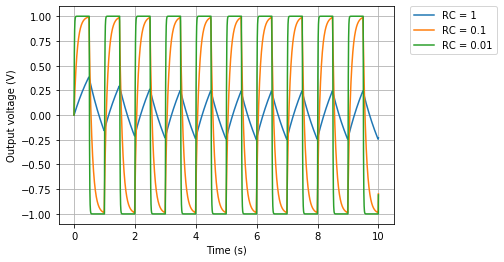

In [65]:
from scipy import signal

def g(Vout, RC, t):
    Vin = signal.square(2*np.pi*t)
    return (RC**-1)*(Vin-Vout)

def RK4(Vout, RC, start, end, N):
    time = np.linspace(start,end,N)
    h = (end-start)/N
    voltage = []
    for t in time:
        if t==0:
            Vout=0
        else:
            k1 = h*g(Vout, RC, t)
            k2 = h*g(Vout+k1/2, RC, t+h/2)
            k3 = h*g(Vout+k2/2, RC, t+h/2)
            k4 = h*g(Vout+k3/2, RC, t+h)
            Vout += (k1+2*k2+2*k3+k4)/6
        voltage.append(Vout)
    voltage = np.array(voltage)
    time = np.array(time)
    return time, voltage 

RC1 = RK4(0, 1,  0, 10, 1000)
RC01 = RK4(0, 0.1,  0, 10, 1000)
RC001 = RK4(0, 0.01, 0, 10, 10000)

plt.plot(RC1[0],RC1[1], label='RC = 1')
plt.plot(RC01[0],RC01[1], label='RC = 0.1')
plt.plot(RC001[0],RC001[1], label='RC = 0.01')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Output voltage (V)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

c) 

Problem 3\
a) $\frac{dN_a}{dt}=-\frac{N_A}{\tau_A}$  $\frac{dN_B}{dt}=\frac{N_A}{\tau_A}-\frac{N_B}{\tau_B}$

Text(0, 0.5, 'number of particles')

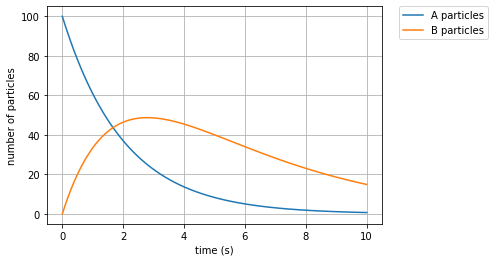

In [2]:
ta = 1
tb = 1
def fA(Na, ta, t):
    return -Na/ta
def fB(Na, ta, Nb, tb, t):
    return Na/ta-(Nb/tb)

def RK4(Na, ta, Nb, tb, start, end, N, t):
    time = np.linspace(start,end,N)
    h = (end-start)/N
    numA = []
    numB = []
    for t in time:
        if t==0:
            Na=Na
            Nb=Nb
        else:
            k1 = h*fA(Na, ta, t)
            k2 = h*fA(Na+k1/2, ta, t+h/2)
            k3 = h*fA(Na+k2/2, ta, t+h/2)
            k4 = h*fA(Na+k3/2, ta, t+h)
            Na += (k1+2*k2+2*k3+k4)/6
            
            k1b = h*fB(Na, ta, Nb, tb, t)
            k2b = h*fB(Na, ta, Nb+k1b/2, tb, t+h/2)
            k3b = h*fB(Na, ta, Nb+k2b/2, tb, t+h/2)
            k4b = h*fB(Na, ta, Nb+k3b/2, tb, t+h)
            Nb += (k1b+2*k2b+2*k3b+k4b)/6
        numA.append(Na)
        numB.append(Nb)
    numA = np.array(numA)
    numB = np.array(numB)
    time = np.array(time)
    return time, numA, numB 

particles = RK4(100, 2, 0, 4, 0, 10, 100, 0)

plt.plot(particles[0], particles[1], label='A particles')
plt.plot(particles[0], particles[2], label='B particles')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("number of particles")

b) Solving the first differential equation is quite simple and gives $$N_A=Ae^{-t/\tau_A}$$ where $A$ is the initial number of $A$ nuclei. Solving the second one is a bit more complicated since it's coupled to the first. To solve it, we will first solve the homogeneous soltuion which gives $$N_B^h=De^{-t/\tau_B}$$ We guess that the particular solution will be $$N_B^p = Ce^{-t/\tau}$$ and will solve for $\tau$, $C$, and $D$. Rewriting the differential equation in terms of our guess, $$-\frac{Ce^{-t/\tau}}{\tau}+\frac{Ce^{-t/\tau}}{\tau_B}=\frac{Ae^{-t/\tau_A}}{\tau_A}\;\;\;\rightarrow\;\;\;Ce^{-t/\tau}\left(\frac{1}{\tau_B}-\frac{1}{\tau}\right)$$ which shows clearly that $\tau=\tau_A$ and solving for $C$ gives,$$C=\frac{\tau_B}{\tau_A-\tau_B}A$$ Adding the homogenous and particular solutions yields the solution, $$N_B=N_B^h+N_B^p=De^{-t/\tau_B}+\frac{\tau_B}{\tau_A-\tau_B}Ae^{-t/\tau_A} $$
Using the initial condition that at $t=0$, the number of B nuclei is $B$ allows us to solve for $D$ and yields the final solution for $N_B$, 
$$N_B=\left(B-\frac{A\tau_B}{\tau_A-\tau_B}\right)e^{-t/\tau_B}+\frac{A\tau_B}{\tau_A-\tau_B}e^{-t/\tau_A} $$

Text(0, 0.5, 'number of particles')

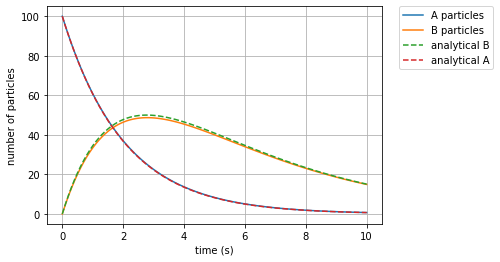

In [3]:
def NB(B, A, ta, tb, t):
    return (B-(A*tb/(ta-tb)))*np.exp(-t/tb)+(A*tb/(ta-tb))*np.exp(-t/ta)
def NA(A, ta, t):
    return A*np.exp(-t/ta)

time = np.linspace(0,10,100)
a=[]
b=[]
for t in time:
    a.append(NA(100, 2, t))
    b.append(NB(0,100,2,4,t))

particles = RK4(100, 2, 0, 4, 0, 10, 100, 0)

plt.plot(particles[0], particles[1], label='A particles')
plt.plot(particles[0], particles[2], label='B particles')
plt.plot(time, b, label = 'analytical B', linestyle='dashed')
plt.plot(time, a, label = 'analytical A', linestyle='dashed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("number of particles") 
##### analytic solution is very close to the numerical solution ######

c) Explore the behavior for different values of the ratio $\frac{\tau_A}{\tau_B}$ and find the importantlimits of $\frac{\tau_A}{\tau_B}$. \
$N_B$ should not exist for $\frac{\tau_A}{\tau_B} =1$ which shows some inaccuracy in the numerical soltion since, as we can see below, there is still some output for when $\tau_A=\tau_B$.

Text(0, 0.5, 'number of particles')

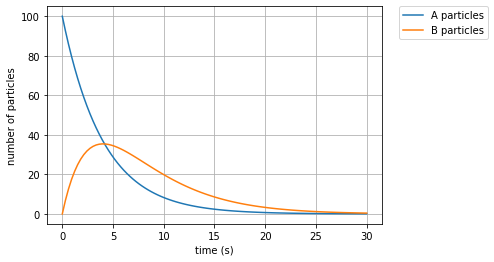

In [4]:
#### tau_a = 4, tau_b = 4, tau_a/tau_b = 1 #####
particles = RK4(100, 4, 0, 4, 0, 30, 100, 0)

plt.plot(particles[0], particles[1], label='A particles')
plt.plot(particles[0], particles[2], label='B particles')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("number of particles")

If $\frac{\tau_A}{\tau_B}<<1$ then the number of A nuclei decays very quickly into B nuclei and the B nuclei decay slower.

Text(0, 0.5, 'number of particles')

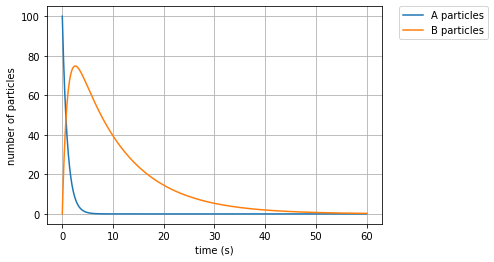

In [5]:
#### tau_a = 1, tau_b = 10, tau_a/tau_b = 0.1<<1 #####
particles = RK4(100, 1, 0, 10, 0, 60, 1000, 0)

plt.plot(particles[0], particles[1], label='A particles')
plt.plot(particles[0], particles[2], label='B particles')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("number of particles")

If $\frac{\tau_A}{\tau_B}>>1$ then the B nuclei will decay so quickly that they will never surpass the number of A nuclei.

Text(0, 0.5, 'number of particles')

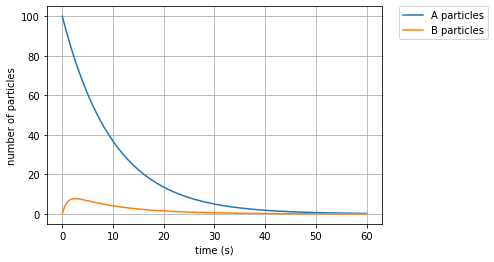

In [6]:
#### tau_a = 10, tau_b = 1, tau_a/tau_b = 10>>1 #####
particles = RK4(100, 10, 0, 1, 0, 60, 1000, 0)

plt.plot(particles[0], particles[1], label='A particles')
plt.plot(particles[0], particles[2], label='B particles')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("number of particles")

d) Provide a physical interpretation the short and long time behaviors for different values of the ratio $\frac{\tau_A}{\tau_B}$\
A larger value, $\frac{\tau_A}{\tau_B}>>1$, of $\frac{\tau_A}{\tau_B}$ will have the B nuclei decay very quickly so that the number of B nuclei never surpasses the number of A nuclei. This means that A nuclei will decay into B nuclei at a much slower rate than B nuclei decay. A small value, $\frac{\tau_A}{\tau_B}<<1$, of $\frac{\tau_A}{\tau_B}$ will result in a very quick decay of A nuclei into B nuclei followed by a relatively slow decay of the B nuclei. So, the A nuclei will decay much more quickly into B nuclei than B nuclei will decay.

Problem 4\
$\vec{F}_D=-\frac{1}{2}C_dA\rho\vec{v}\cdot\vec{v}\hat{v}$\
a)

In [35]:
C = 0.5*0.3*(1/0.15)*np.pi*0.037**2 #(0.5*C_d*A)/m (prefactor divided by mass so that force can be C times velocity)

def xvel(vx, vy):
    theta = np.arctan(vy/vx)
    return -C*(vx**2+vy**2)*np.cos(theta)
def yvel(vy, vx):
    theta = np.arctan(vy/vx)
    return -9.81-C*(vx**2+vy**2)*np.sin(theta)
def xpos(v, t):
    return v*t
def ypos(v, t):
    return v*t#-0.5*9.81*t**2

def RK4(v, theta0, start, end, N):
    time = np.linspace(start, end, N)
    h = (end-start)/N
    xvelocity = []
    yvelocity = []
    xposition = []
    yposition = []
    theta0 = theta0*np.pi/180
    for t in time: 
        if t==0:
            vx=v*np.cos(theta0)
            vy=v*np.sin(theta0)
            x=0
            y=0   
        
        else:   
            k1x = h*xvel(vx, vy)
            k2x = h*xvel(vx+k1x/2, vy)
            k3x = h*xvel(vx+k2x/2, vy)
            k4x = h*xvel(vx+k3x/2, vy)
            
            k1y = h*yvel(vy, vx)
            k2y = h*yvel(vy+k1y/2, vx)
            k3y = h*yvel(vy+k2y/2, vx)
            k4y = h*yvel(vy+k3y/2, vx)
            
            vx += (k1x+2*k2x+2*k3x+k4x)/6
            vy += (k1y+2*k2y+2*k3y+k4y)/6

            x += xpos(vx,h)
            y += ypos(vy,h)
            
            if y<0:
                vx = 0.6*np.sqrt(vx**2+vy**2)*np.cos(np.arctan(-vy/vx))
                vy = 0.6*np.sqrt(vx**2+vy**2)*np.sin(np.arctan(-vy/vx))
                
                k1x = h*xvel(vx, vy)
                k2x = h*xvel(vx+k1x/2, vy)
                k3x = h*xvel(vx+k2x/2, vy)
                k4x = h*xvel(vx+k3x/2, vy)
                
                k1y = h*yvel(vy, vx)
                k2y = h*yvel(vy+k1y/2, vx)
                k3y = h*yvel(vy+k2y/2, vx)
                k4y = h*yvel(vy+k3y/2, vx)
                
                vx += (k1x+2*k2x+2*k3x+k4x)/6
                vy += (k1y+2*k2y+2*k3y+k4y)/6
    
                x += xpos(vx,h)
                y += ypos(vy,h)
       
        xvelocity.append(vx)
        yvelocity.append(vy)
        xposition.append(x)
        yposition.append(y)
        
    xvelocity = np.array(xvelocity)
    yvelocity = np.array(yvelocity)
    xposition = np.array(xposition)
    yposition = np.array(yposition)
    time = np.array(time)
    
    return time, xvelocity, yvelocity, xposition, yposition


b)

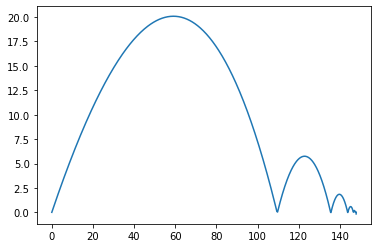

In [44]:
ball = RK4(41.6667, 32, 0, 10, 1000)

# plt.plot(ball[3], ball[4], label = 'position')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.grid()
# plt.xlabel("x position (m)")
# plt.ylabel("y position (m)")

plt.plot(ball[3], ball[4])
#plt.plot(ball[0], ball[2])

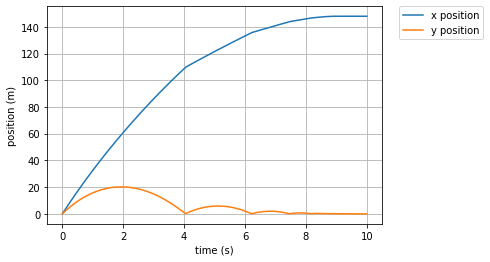

In [45]:
plt.plot(ball[0], ball[3], label = 'x position')
plt.plot(ball[0], ball[4], label = 'y position')
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("position (m)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

c) Already done in the code above. 

d)

In [77]:
distances =[]
angles = np.linspace(0,90,91)
for i in angles:
    ball3 = RK4(30, i, 0, 15, 10000)
    distances.append(ball3[3][-1])

Text(0, 0.5, 'x distance (m)')

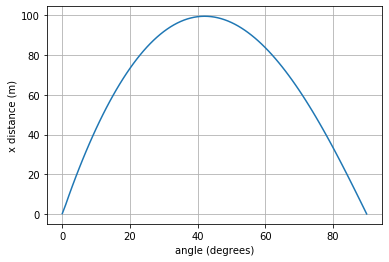

In [78]:
plt.plot(angles, distances)
plt.grid()
plt.xlabel("angle (degrees)")
plt.ylabel("x distance (m)")

In [80]:
print("maximum distance traveled =", max(distances))
print("angle that gives maximum distance traveled = ", distances.index(max(distances)))

maximum distance traveled = 99.61262945905226
angle that gives maximum distance traveled =  42


e) WORK

In [186]:
C = 0.5*0.3*(1/0.15)*np.pi*0.037**2 #(0.5*C_d*A)/m (prefactor divided by mass so that force can be C times velocity)

def xvel(vx, vy):
    theta = np.arctan(vy/vx)
    return -C*(vx**2+vy**2)*np.cos(theta)
def yvel(vy, vx):
    theta = np.arctan(vy/vx)
    return -9.81-C*(vx**2+vy**2)*np.sin(theta)
def xpos(v, t):
    return v*t
def ypos(v, t):
    return v*t#-0.5*9.81*t**2
def drag(vx, vy, h):
    return -C*0.15*(vx**2+vy**2)*np.sqrt(xpos(vx,h)**2+ypos(vy,h)**2)

def RK4(v, theta0, start, end, N):
    time = np.linspace(start, end, N)
    h = (end-start)/N
    xvelocity = []
    yvelocity = []
    xposition = []
    yposition = []
    count = []
    work = []
    energy=[]
    w = 0
    E=0
    i=0
    theta0 = theta0*np.pi/180
    for t in time: 
        if t==0:
            vx=v*np.cos(theta0)
            vy=v*np.sin(theta0)
            x=0
            y=0 
        
        else:   
            k1x = h*xvel(vx, vy)
            k2x = h*xvel(vx+k1x/2, vy)
            k3x = h*xvel(vx+k2x/2, vy)
            k4x = h*xvel(vx+k3x/2, vy)
            
            k1y = h*yvel(vy, vx)
            k2y = h*yvel(vy+k1y/2, vx)
            k3y = h*yvel(vy+k2y/2, vx)
            k4y = h*yvel(vy+k3y/2, vx)
            
            vx += (k1x+2*k2x+2*k3x+k4x)/6
            vy += (k1y+2*k2y+2*k3y+k4y)/6
            
            x += xpos(vx,h)
            y += ypos(vy,h)
            count.append(t)
            if y<0:
                break
        
        w += drag(vx, vy, h)
        E = 0.5*0.15*(vx**2+vy**2)+0.15*9.81*y     
        
        work.append(w)
        energy.append(E)      
        xvelocity.append(vx)
        yvelocity.append(vy)
        xposition.append(x)
        yposition.append(y)
    
    work = np.array(work)
    energy = np.array(energy)
    xvelocity = np.array(xvelocity)
    yvelocity = np.array(yvelocity)
    xposition = np.array(xposition)
    yposition = np.array(yposition)
    time = np.array(time)
    
    return time, xvelocity, yvelocity, xposition, yposition, work, energy, count

-25.70917489550615 -25.71076082013547


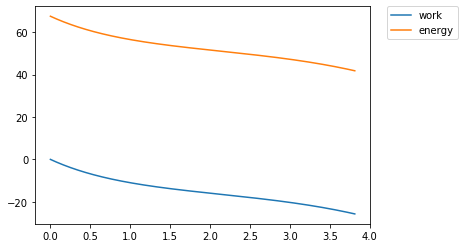

In [190]:
ball4 = RK4(30, 42, 0, 10, 100000)

WE=ball4[6]-ball4[5]
plt.plot(ball4[7], ball4[5], label = 'work')
plt.plot(ball4[7], ball4[6], label = 'energy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
Ediff = ball4[6][-1]-ball4[6][0]
print(ball4[5][-1], Ediff)

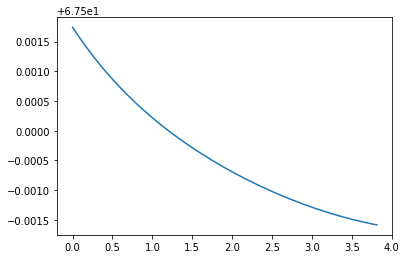

In [191]:
plt.plot(ball4[7], WE)

Plot above shows good conservation of energy

Problem 5\
a) $c=\hbar=1$

In [97]:
# x=r, y =theta, units of eV where c=hbar=1
muNI = 4.7*4.25 #Tm 
m0 = 105.7 #MeV/c^2

def magfield(x):
    return muNI/x

def gamma(vx, vy):
    v = vx**2+vy**2
    return 1/np.sqrt(1-v)

def momx(py, x):
    B = magfield(x)
    return -py*B/m0

def momy(px, x):
    B = magfield(x)
    return px*B/m0

def pos(p, t):
    return p*t/m0

def RK4(p0, start, end, N):
    time = np.linspace(start, end, N)
    h = (end-start)/N
    xmomentum = []
    ymomentum = []
    xposition = []
    yposition = []

    for t in time: 
        if t==0:
            px=p0
            py=0
            x=4.25
            y=0
        
        else:   
            k1y = h*momy(px, x)
            k2y = h*momy(px+k1y/2, x)
            k3y = h*momy(px+k2y/2, x)
            k4y = h*momy(px+k3y/2, x)
            
            k1x = h*momx(py, x)
            k2x = h*momx(py+k1x/2, x)
            k3x = h*momx(py+k2x/2, x)
            k4x = h*momx(py+k3x/2, x)
            
            px += (k1x+2*k2x+2*k3x+k4x)/6
            py += (k1y+2*k2y+2*k3y+k4y)/6
            
            x += pos(px,h)
            y += pos(py,h) 
            
            if x>11:
                x += pos(px,h)
                y += pos(py,h)
            if x>15.7:
                break
            
        xmomentum.append(px)
        ymomentum.append(py)
        xposition.append(x)
        yposition.append(y)
    
    xmomentum = np.array(xmomentum)
    ymomentum = np.array(ymomentum)
    xposition = np.array(xposition)
    yposition = np.array(yposition)
    time = np.array(time)
    
    return time, xmomentum, ymomentum, xposition, yposition

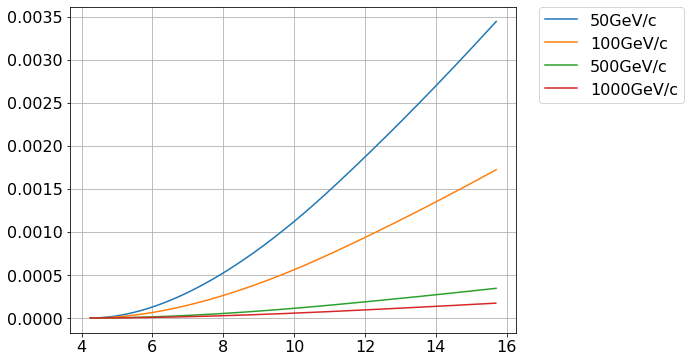

In [98]:
test = RK4(50e3, 0, 0.1, 100000)
test2 = RK4(100e3, 0, 0.1, 100000)
test3 = RK4(500e3, 0, 0.1, 100000)
test4 = RK4(1000e3, 0, 0.1, 100000)
plt.plot(test[3], test[4], label = '50GeV/c')
plt.plot(test2[3], test2[4], label = '100GeV/c')
plt.plot(test3[3], test3[4], label = '500GeV/c')
plt.plot(test4[3], test4[4], label = '1000GeV/c')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [99]:
print("deflection for 50GeV/c =", test[4][-1])
print("deflection for 100GeV/c =", test2[4][-1])
print("deflection for 500GeV/c =", test3[4][-1])
print("deflection for 1000GeV/c =", test4[4][-1])

deflection for 50GeV/c = 0.0034450934016745476
deflection for 100GeV/c = 0.0017225471544772483
deflection for 500GeV/c = 0.00034459546141686305
deflection for 1000GeV/c = 0.00017221162459788293


In [96]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16

b) 1% of 80$\mu$m $\rightarrow$ accuracy to 0.8e-6.

In [208]:
acc1 = RK4(50e3, 0, 0.1, 18000)
acc2 = RK4(50e3, 0, 0.1, 18200)
error = np.abs(acc1[4][-1]-acc2[4][-1])
print(error)

7.913803032962193e-07


In [216]:
a = np.linspace(100, 10000100, 10000)
for i in a:
    acc1 = RK4(50e3, 0, 0.1, i)
    acc2 = RK4(50e3, 0, 0.1, i+100)
    error = np.abs(acc1[4][-1]-acc2[4][-1])
    if error<0.8e-6:
        print(i)
        break

7100.700070007


/Users/calvin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
